### **1. Import Necessary Modules**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

### **2. Load Data**

In [2]:
df1 = pd.read_excel("E:\ML\RoadMap\w14_EDA\LargeScaleDataAnalysis\Online Retail.xlsx",dtype={"InvoiceNo":"string","StockCode":"string","Description":"string","Country":"string"})
df1.info()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
E:\USER_TEMP\TEMP\ipykernel_22060\2699401577.py:1: SyntaxWarning: invalid escape sequence '\M'
  df1 = pd.read_excel("E:\ML\RoadMap\w14_EDA\LargeScaleDataAnalysis\Online Retail.xlsx",dtype={"InvoiceNo":"string","StockCode":"string","Description":"string","Country":"string"})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


In [3]:
df1.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


### **3. Handle Missing Values**

In [4]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

##### we deifne a boolean mask that will give us true/false rows.the number of rows in the mask is equal to the rows in the dataframe

In [5]:
mask1 = df1.Description.isnull()
mask1

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: Description, Length: 541909, dtype: bool

##### we pass the mask to the df[] it will only show the rows that have True values

In [6]:
df1[mask1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [7]:
# we will be using temp_df1 for the cleaning of Description column moving foward
temp_df1 = df1[mask1][['StockCode','Description']]
temp_df1

,StockCode,Description
622,22139,<NA>
1970,21134,<NA>
1971,22145,<NA>
1972,37509,<NA>
1987,85226A,<NA>
...,...,...
535322,84581,<NA>
535326,23406,<NA>
535332,21620,<NA>
536981,72817,<NA>


In [8]:
temp_df1.groupby("StockCode").size()

StockCode
10002           2
10080           1
10123C          1
10123G          1
10134           1
               ..
DCGS0074        1
DOT             1
POST            4
gift_0001_10    1
gift_0001_30    1
Length: 960, dtype: int64

In [9]:
# above the StockCode column is as the index.no we a assigning a new index for the datafram and a new column
temp_df1.groupby("StockCode").size().reset_index(name="NullDescriptionCount").sort_values(by=["NullDescriptionCount"],ascending=False).reset_index(drop=True)

,StockCode,NullDescriptionCount
0,35965,10
1,23084,10
2,22084,9
3,22451,6
4,23348,5
...,...,...
955,22453,1
956,22454,1
957,22461,1
958,22467,1


In [10]:
# now we will see what are the valid descriptions available for the most description null having stockCode
df1[df1.StockCode == "35965"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2889,536592,35965,FOLKART HEART NAPKIN RINGS,4,2010-12-01 17:06:00,3.36,NaN,United Kingdom
6017,536876,35965,FOLKART HEART NAPKIN RINGS,1,2010-12-03 11:36:00,3.36,NaN,United Kingdom
7205,537013,35965,<NA>,-25,2010-12-03 15:40:00,0.00,NaN,United Kingdom
8071,537126,35965,FOLKART HEART NAPKIN RINGS,1,2010-12-05 12:13:00,2.95,18118.0,United Kingdom
10678,537237,35965,FOLKART HEART NAPKIN RINGS,3,2010-12-06 09:58:00,3.36,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
347758,567337,35965,<NA>,5,2011-09-19 14:56:00,0.00,NaN,United Kingdom
349563,567507,35965,FOLKART HEART NAPKIN RINGS,12,2011-09-20 14:46:00,0.97,NaN,United Kingdom
454169,575513,35965,<NA>,7,2011-11-10 10:39:00,0.00,NaN,United Kingdom
464522,576110,35965,<NA>,5,2011-11-14 10:33:00,0.00,NaN,United Kingdom


In [11]:
# similarly we will check for the second most null description having stock code, if there are valid descriptions left
df1[df1.StockCode=="23084"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
183218,552654,23084,RABBIT NIGHT LIGHT,2,2011-05-10 14:20:00,2.08,15756.0,United Kingdom
184972,552724,23084,RABBIT NIGHT LIGHT,6,2011-05-11 10:29:00,2.08,13418.0,United Kingdom
185355,552811,23084,RABBIT NIGHT LIGHT,24,2011-05-11 12:43:00,1.79,17677.0,United Kingdom
185404,552816,23084,RABBIT NIGHT LIGHT,1,2011-05-11 12:47:00,2.08,15521.0,United Kingdom
185606,552822,23084,RABBIT NIGHT LIGHT,30,2011-05-11 12:59:00,1.79,15521.0,United Kingdom
...,...,...,...,...,...,...,...,...
541250,581496,23084,RABBIT NIGHT LIGHT,18,2011-12-09 10:20:00,2.08,16558.0,United Kingdom
541304,581497,23084,RABBIT NIGHT LIGHT,37,2011-12-09 10:23:00,4.96,NaN,United Kingdom
541630,581538,23084,RABBIT NIGHT LIGHT,2,2011-12-09 11:34:00,2.08,14446.0,United Kingdom
541824,581579,23084,RABBIT NIGHT LIGHT,24,2011-12-09 12:19:00,1.79,17581.0,United Kingdom


In [12]:
# now we are going to replace the NA values of description with most occuring valid descrition value for a specific StockCode
# first we will create a data frame called most_freq. it will have have the most occuring Description value for each stockCode
#then we will do a leftmerge on df1 with the most_freq

most_freq = df1[["StockCode","Description"]].value_counts().reset_index(name="Count").sort_values(by="Count",ascending=False).groupby("StockCode").first().reset_index()
most_freq

,StockCode,Description,Count
0,10002,INFLATABLE POLITICAL GLOBE,71
1,10080,GROOVY CACTUS INFLATABLE,22
2,10120,DOGGY RUBBER,30
3,10123C,HEARTS WRAPPING TAPE,3
4,10124A,SPOTS ON RED BOOKCOVER TAPE,5
...,...,...,...
3953,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,9
3954,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,7
3955,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,3
3956,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,4


In [13]:
# random check if unique StockCode have unique Descriptions
most_freq[most_freq.StockCode=="23084"]

,StockCode,Description,Count
1947,23084,RABBIT NIGHT LIGHT,1051


In [14]:
# merge the most freq with the df1 on column StockCode.
most_freq.rename(columns={"Description":"most_freq_Description"},inplace=True)
most_freq
# df2 = df1.merge(right=most_freq,how='left',on="StockCode")
# df2

,StockCode,most_freq_Description,Count
0,10002,INFLATABLE POLITICAL GLOBE,71
1,10080,GROOVY CACTUS INFLATABLE,22
2,10120,DOGGY RUBBER,30
3,10123C,HEARTS WRAPPING TAPE,3
4,10124A,SPOTS ON RED BOOKCOVER TAPE,5
...,...,...,...
3953,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,9
3954,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,7
3955,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,3
3956,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,4


In [15]:
df2 = df1.merge(right=most_freq,on="StockCode",how="left")
df2["Description"] = df2["most_freq_Description"]
df2.drop(columns=["most_freq_Description","Count"],inplace=True)
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [16]:
# we will now check if there are any more left Description null rows
df2.isnull().sum()

InvoiceNo           0
StockCode           0
Description       112
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [17]:
# we will drop the rows with null description 
df2 = df2.dropna(subset=['Description'])
df2.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134968
Country             0
dtype: int64

In [18]:
# since it's impossible to replace customer id null values like we did before. we will drop these rows as well
df2 = df2.dropna(subset=["CustomerID"])
df2.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
print(df1.shape)
print(df2.shape)

(541909, 8)
(406829, 8)


### **4.Handle wrong fomat values**

In [20]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [21]:
# Function to ensure proper datetime formatting (for future use or mixed data)
def standardize_datetime_column(df, column_name):
    """
    Standardizes a datetime column to ensure proper formatting
    """
    print(f"Standardizing {column_name} column...")
    
    # Check if already datetime
    if df[column_name].dtype == 'datetime64[ns]':
        print(f"✓ {column_name} is already in correct datetime format")
        
    
    try:
        # Convert to datetime if not already
        df[column_name] = pd.to_datetime(df[column_name], errors='coerce')
        
        # Check for any conversion errors (NaT values)
        nat_count = df[column_name].isna().sum()
        if nat_count > 0:
            print(f"⚠ Warning: {nat_count} dates could not be parsed and were set to NaT")
            print("Consider reviewing these records:")
            print(df[df[column_name].isna()].head())
        
        print(f"✓ {column_name} successfully converted to datetime")
        print(f"Date range: {df[column_name].min()} to {df[column_name].max()}")
        
    except Exception as e:
        print(f"✗ Error converting {column_name}: {e}")
    
    return df

# Apply the function to our InvoiceDate column
df2 = standardize_datetime_column(df2, 'InvoiceDate')

Standardizing InvoiceDate column...
✓ InvoiceDate is already in correct datetime format
✓ InvoiceDate successfully converted to datetime
Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


### **5. Handling wrong data**

In [22]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


#### Quantity has a min value of negative. we will investigate further

In [23]:
df2.sort_values(by="Quantity").head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom
160143,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,2011-04-18 13:08:00,2.55,15749.0,United Kingdom
224419,C556522,22920,HERB MARKER BASIL,-1515,2011-06-13 11:21:00,0.55,16938.0,United Kingdom
187609,C552995,M,Manual,-1350,2011-05-12 15:19:00,0.16,18133.0,United Kingdom
160142,C550456,47566B,TEA TIME PARTY BUNTING,-1300,2011-04-18 13:08:00,2.55,15749.0,United Kingdom
390548,C570556,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1296,2011-10-11 11:10:00,1.06,16029.0,United Kingdom


In [24]:
# the item with StockCode 2348 has the highest negative quantity
# let's see others with the same stock code
df2[(df2.StockCode=="23843") & (df2.CustomerID==16446.0)].sort_values(by="Quantity")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [25]:
# these seems to be refunds or so. we will remove these assuming these are refunds
df3 = df2[df2.Quantity>0]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.000000,397924,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.420210,NaN,22.096788,1713.169877


In [ ]:
# when we sort the records on Quantity in ascending order. And check the 75 percentile value
df3.Quantity.quantile(0.75)

12.0

In [ ]:
# this means that after sorting(by Quantity) and when we cut the dataset at the 75%. the quantity value is 12.
# if we cut at 50% the quantity value is 2. that means that half of the records have a quantity of 2 or less.
# and 75% of the records have a quantity of 12 or less.

In [ ]:
# the Quantity have very large value like 80995. we will check whether they seem to be valid
df3.Quantity.quantile(0.9999)

1520.192499999248

In [29]:
df3[df3.Quantity>1520]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom
52710,540815,21175,GIN + TONIC DIET METAL SIGN,2000,2011-01-11 12:55:00,1.85,15749.0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
80742,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2011-02-03 10:50:00,0.21,16333.0,United Kingdom
87631,543669,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2011-02-11 11:22:00,0.94,16029.0,United Kingdom


In [ ]:
# seems like there's no need to remove outliers using quartiles.

#### seems like data data cleaning part is done. We will move to the Feature Engineering part next. 

In [33]:
df4 = df3.copy()
df4["TotalSales"] = df4["Quantity"]*df4["UnitPrice"];
df4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


### **Visualisation and EDA**

#### **5.Monthly Sales Plot**

In [ ]:
df4["Month"]=df4["InvoiceDate"].dt.month
# let's see if the month is correctly shown by taking a random sample
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
119605,546555,21754,HOME BUILDING BLOCK WORD,18,2011-03-15 09:22:00,5.45,17675.0,United Kingdom,98.1,3
88746,543815,82551,LAUNDRY 15C METAL SIGN,2,2011-02-13 15:18:00,1.45,17255.0,United Kingdom,2.9,2
81211,543114,21531,RED RETROSPOT SUGAR JAM BOWL,6,2011-02-03 13:26:00,2.55,14156.0,EIRE,15.3,2
268293,560398,22629,SPACEBOY LUNCH BOX,20,2011-07-18 14:10:00,1.95,12731.0,France,39.0,7
14773,537618,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,120,2010-12-07 13:50:00,1.88,15061.0,United Kingdom,225.6,12


In [ ]:
monthly_sales = df4.groupby("Month")["TotalSales"].sum()
monthly_sales

Month
1      569445.040
2      447137.350
3      595500.760
4      469200.361
5      678594.560
6      661213.690
7      600091.011
8      645343.900
9      952838.382
10    1039318.790
11    1161817.380
12    1090906.680
Name: TotalSales, dtype: float64

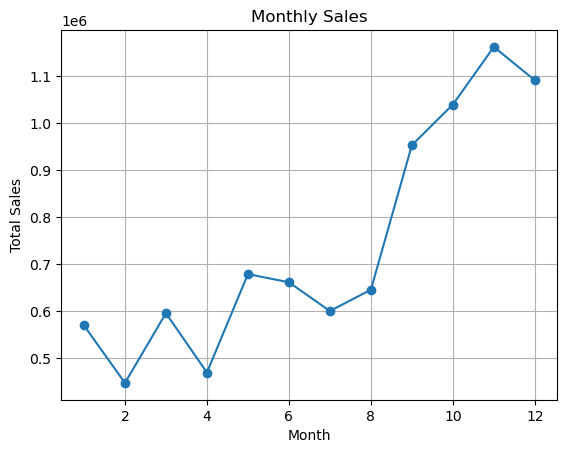

In [ ]:
monthly_sales.plot(kind="line",title="Monthly Sales",marker="o")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

##### Insights
At the end of the year the montly sales seems to be increasing. May be because the end of the year have holidays and festivals.

#### **6. Top 5 Countires by Total Sales**

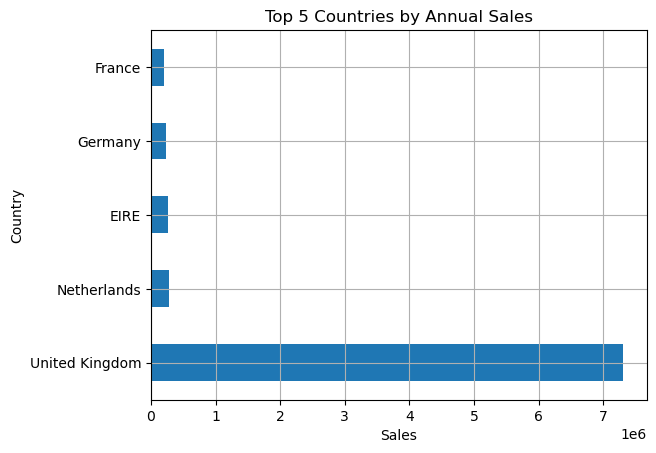

In [85]:
countries_sum = df4.groupby("Country",sort=False)["TotalSales"].sum().sort_values(ascending=False)
top_5_countries = countries_sum.head(5)
top_5_countries.plot(kind="barh",title="Top 5 Countries by Annual Sales",xlabel="Sales",ylabel="Country")
plt.grid()
plt.show()